# Mod 5 Project: Classifying Life Expectancy 
## (World Health Organization Data)

**Group Partners: Filis, Manisha, Pablo**

___

In [4]:
!pip install altair vega_datasets notebook vega

!pip install pandas-profiling

    100% |████████████████████████████████| 583kB 3.1MB/s ta 0:00:01
    100% |████████████████████████████████| 215kB 2.2MB/s ta 0:00:01
    100% |████████████████████████████████| 1.1MB 3.6MB/s ta 0:00:01
  Stored in directory: /Users/flatironschool/Library/Caches/pip/wheels/92/2e/85/0da206e5c19a13b02b1b5b27752bc9c304384d8b22e30dff0f
Successfully built vega


Ran the following commands in terminal to install Profiling (visualizing data), and Altair (map):

```
conda install -c conda-forge altair vega_datasets notebook vega
```

```
conda install -c anaconda pandas-profiling
```

## Import libraries

In [7]:
#Data Manipulation
import pandas as pd  
import numpy as np

# #Making Map Visualizations
# import altair as alt
# alt.renderers.enable('notebook')
# from vega_datasets import data

# #Making Line Plot Visualizations
# import plotly.plotly as py 
# import cufflinks as cf 
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
# init_notebook_mode(connected=True) 
# cf.go_offline()

#Displaying EDA Profile
import pandas_profiling

#Disabling warnings 
import warnings
warnings.filterwarnings('ignore')

# Classifiers
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn import svm

# Measuring models and feature importance
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn processing stuff
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn import preprocessing

## Read in csv and display first five rows

In [8]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Dimensions of dataset 

In [9]:
df.shape

(2938, 22)

## Check for NaN's in out entire dataset

In [10]:
df.isna().sum().sort_values(ascending=False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 BMI                                34
 thinness  1-19 years               34
 thinness 5-9 years                 34
Diphtheria                          19
Polio                               19
Adult Mortality                     10
Life expectancy                     10
under-five deaths                    0
 HIV/AIDS                            0
Measles                              0
percentage expenditure               0
infant deaths                        0
Status                               0
Year                                 0
Country                              0
dtype: int64

## Visualizing the distribution of our potential target variable, life expectancy

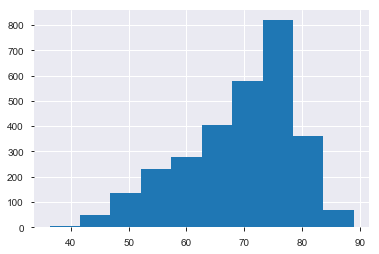

In [11]:
df['Life expectancy '].hist()

## Seeing any trend of the life expectancies with respect to years

In [12]:
# #This plot of life expectancies is of one country with respect to years. 
# df_group.loc['Albania'].iplot(y='Life expectancy ')
# print('Albania')


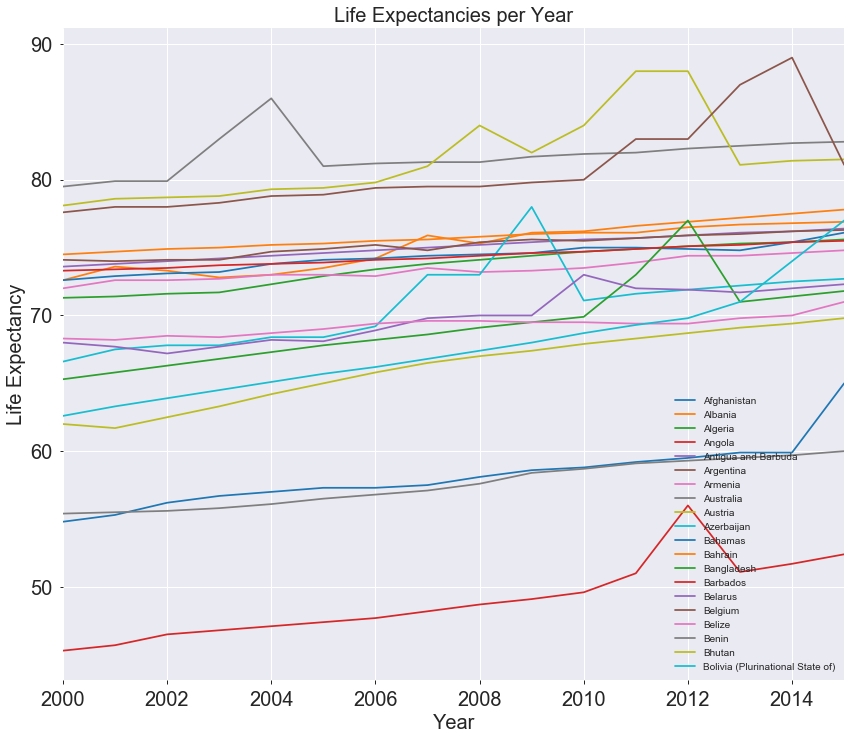

In [13]:
df_group = df.set_index(['Country', 'Year'])
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
countries = df['Country'].unique()
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)
plt.ylabel('Life Expectancy', fontsize=20)
plt.xlabel('Years', fontsize=20)
plt.title('Life Expectancies per Year', fontsize=20)

for country in countries[:20]:
    df_group.loc[country].plot(y='Life expectancy ', ax=ax)
L = plt.legend(countries[:20])

plt.savefig('Life Expectacies per Year.png')

#### Finding: Most countries appear relatively flat, indicating a small correlation with time dependence. We investigate this more below. 

## Using profiling to speed up exporatory data analysis (EDA)

In [14]:
# profile = pandas_profiling.ProfileReport(df)

In [15]:
# from IPython.core.display import display, HTML
# display(HTML(profile.html))


## Displaying the columns in our dataset

In [16]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Column descriptions

`Status`
Developed or Developing status

`Life expectancy` 
Life Expectancy in age

`Adult Mortality`
Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

`infant deaths`
Number of Infant Deaths per 1000 population

`Alcohol`
Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

`percentage expenditure`
Expenditure on health as a percentage of Gross Domestic Product per capita(%)

`Hepatitis B`
Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

`Measles` 
Measles - number of reported cases per 1000 population

`BMI` 
Average Body Mass Index of entire population

`under-five deaths` 
Number of under-five deaths per 1000 population

`Polio`
Polio (Pol3) immunization coverage among 1-year-olds (%)

`Total expenditure`
General government expenditure on health as a percentage of total government expenditure (%)

`Diphtheria` 
Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

`HIV/AIDS`
Deaths per 1 000 live births HIV/AIDS (0-4 years)

`GDP`
Gross Domestic Product per capita (in USD)

`Population`
Population of the country

`thinness 1-19 years`
Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

`thinness 5-9 years`
Prevalence of thinness among children for Age 5 to 9(%)

`Income composition of resources`
Human Development Index in terms of income composition of resources (index ranging from 0 to 1) url: http://hdr.undp.org/en/content/human-development-index-hdi

`Schooling`
Number of years of Schooling(years)

In [17]:
df.corr()[1:2]

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,0.170033,1.0,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975


## Visualizing the global life expectancy for 2015 using Altair mapping

In [18]:
print('Maximum year is', df['Year'].max())
print('Minimum year is', df['Year'].min())


Maximum year is 2015
Minimum year is 2000


Let's filter by 2015 to make a map of life expectency per country. 

In [19]:
df_2015 = df[df['Year']==2015]

Reading in the country codes tsv to make the map (file generated from UN stats webpage: 
https://unstats.un.org/unsd/methodology/m49/  

In [20]:
country_codes = pd.read_csv('country_code_2.tsv',sep='\t')
country_codes.head()

,Country or Area,M49 code,ISO-alpha3 code
0,Afghanistan,4,AFG
1,Aland Islands,248,ALA
2,Albania,8,ALB
3,Algeria,12,DZA
4,American Samoa,16,ASM


 Matching countries to country names in country codes tsv data

In [21]:
df_2015.replace("Côte d'Ivoire", "Cote d'Ivoire", inplace=True)
df_2015.replace('Swaziland', 'Eswatini', inplace=True)
df_2015.replace('The former Yugoslav republic of Macedonia', 'North Macedonia', inplace=True)

df_2015_map = df_2015.merge(country_codes, how="left", left_on="Country",right_on="Country or Area")
df_2015_map.rename(columns={'M49 code': 'id'}, inplace=True)
df_2015_map.drop(columns=['ISO-alpha3 code', 'Country or Area'], inplace=True)

df_2015_map['tooltip']=df_2015_map['Country']+': '+df_2015_map['Life expectancy '].astype(str) + ' yr'

### Making the map!

In [22]:
source = alt.topo_feature(data.world_110m.url,'countries')

map_plot = alt.Chart(source).mark_geoshape().encode(
    color=alt.Color('Life expectancy :Q', legend=alt.Legend(title='Years')),
    tooltip='tooltip:N'
).transform_lookup(
   lookup='id',
   from_=alt.LookupData(df_2015_map, 'id', ['Life expectancy ', 'tooltip'])
).project(
   type='equirectangular'
).properties(
    width=900,
    height=540,
    title=('Life Expectency in Years')
)


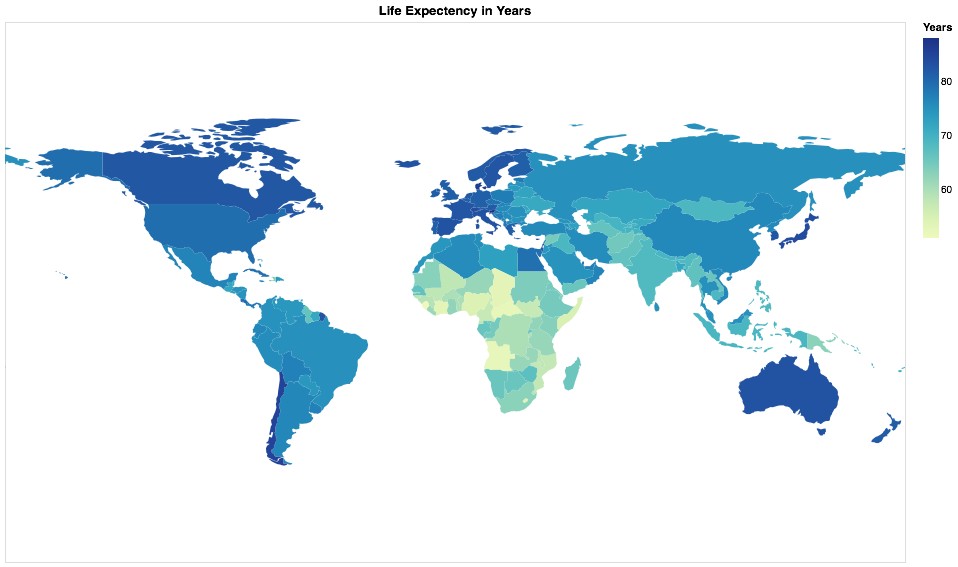

In [23]:
map_plot

#### Finding: The country with the highest life-expectancy is Slovenia (Europe) at 88 years, and the lowest is Sierra Leonne (Africa) at 52 years. 

In [24]:
df_group = df.set_index(['Country','Year'])
df_group.head()

Status  Life expectancy   Adult Mortality  \
Country     Year                                                  
Afghanistan 2015  Developing              65.0            263.0   
            2014  Developing              59.9            271.0   
            2013  Developing              59.9            268.0   
            2012  Developing              59.5            272.0   
            2011  Developing              59.2            275.0   

                  infant deaths  Alcohol  percentage expenditure  Hepatitis B  \
Country     Year                                                                
Afghanistan 2015             62     0.01               71.279624         65.0   
            2014             64     0.01               73.523582         62.0   
            2013             66     0.01               73.219243         64.0   
            2012             69     0.01               78.184215         67.0   
            2011             71     0.01                7.097109         68.0   

                  Measles    BMI   under-five deaths   Polio  \
Country     Year                                               
Afghanistan 2015      1154   19.1                  83    6.0   
            2014       492   18.6                  86   58.0   
            2013       430   18.1                  89   62.0   
            2012      2787   17.6                  93   67.0   
            2011      3013   17.2                  97   68.0   

                  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
Country     Year                                                          
Afghanistan 2015               8.16         65.0        0.1  584.259210   
            2014               8.18         62.0        0.1  612.696514   
            2013               8.13         64.0        0.1  631.744976   
            2012               8.52         67.0        0.1  669.959000   
            2011               7.87         68.0        0.1   63.537231   

                  Population   thinness  1-19 years   thinness 5-9 years  \
Country     Year                                                           
Afghanistan 2015  33736494.0                   17.2                 17.3   
            2014    327582.0                   17.5                 17.5   
            2013  31731688.0                   17.7                 17.7   
            2012   3696958.0                   17.9                 18.0   
            2011   2978599.0                   18.2                 18.2   

                  Income composition of resources  Schooling  
Country     Year                                              
Afghanistan 2015                            0.479       10.1  
            2014                            0.476       10.0  
            2013                            0.470        9.9  
            2012                            0.463        9.8  
            2011                            0.454        9.5

## Drop all NaN's and check remaining length of dataframe

In [25]:
df_nona = df.dropna()

In [26]:
df_nona.shape

(1649, 22)

## Rename "Life expectancy" column as "target"

In [27]:
df_nona.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [28]:
df_nona.rename(columns={'Life expectancy ':'target'}, inplace=True)

In [29]:
df_nona.head()

,Country,Year,Status,target,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Spliting the data at the median value, and anything a above that age will be 1 for long life expectancy and 0 for low life expectancy. 

In [30]:
df_nona['target'].describe()

count    1649.000000
mean       69.302304
std         8.796834
min        44.000000
25%        64.400000
50%        71.700000
75%        75.000000
max        89.000000
Name: target, dtype: float64

In [31]:
median_age = np.median(df_nona['target'])
df_nona['target'] = df_nona.target.apply(lambda x: 1 if x >= median_age  else 0)

In [32]:
df_nona.target.value_counts()

1    828
0    821
Name: target, dtype: int64

In [33]:
df_nona.head()

,Country,Year,Status,target,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,0,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,0,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,0,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,0,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Checking stationarity with respect to the year column 

In [34]:
# Count records the number of countries which are stationary
# The countries printed below (20% of all of our countries in total) may not be stationary -- the life expectancy changed
count = 0 
for country in df_nona['Country'].unique() : 
    check = df_nona.loc[df_nona['Country']== country, 'target'].nunique()
    if (check == 1):
      
        count +=1
    else:
        print(country)

Azerbaijan
Bangladesh
Belarus
Brazil
Bulgaria
Cabo Verde
Colombia
Dominican Republic
El Salvador
Guatemala
Honduras
Iraq
Latvia
Lithuania
Maldives
Mauritius
Morocco
Nicaragua
Romania
Russian Federation
Samoa
Sri Lanka
Suriname
Thailand
Tonga
Trinidad and Tobago
Turkey
Ukraine
Vanuatu


In [35]:
count / df_nona['Country'].nunique()

0.7819548872180451

## Finding #1:
### For 80% of the countries, life-expectency remained stationary. 20% may be non-stationary but overall have a small effect. Thus the life-expectancy does not depend on year. 
<br/>


## Get dummies for status column (categorical)

In [36]:
#developed = 0, developing =1
#need to drop one when setting X for train/test split
df_nona = pd.concat([df_nona, pd.get_dummies(df_nona['Status'])], axis=1)
df_nona.head()

,Country,Year,Status,target,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,Developing,0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,Developing,0,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,Developing,0,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,Developing,0,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,Developing,0,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


## Dropping old status column 

In [41]:
df_nona.drop(['Status'], axis=1, inplace=True)
df_nona.head()

,Country,Year,target,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


# Machine Learning

In [42]:
all_countries = df.Country.unique()
# Choose random countries
num_countries_to_withhold = 100
withhold_countries = set([])
while len(withhold_countries) < num_countries_to_withhold:
    # Get a random integer so we can choose a random country
    withhold_countries.add(all_countries[randint(0, len(all_countries) - 1)])

withhold_countries = list(withhold_countries)
training_countries = [country for country in all_countries if (country not in withhold_countries)]


df_country_split_a = df_nona[df_nona['Country'].isin(training_countries)]
df_country_split_b = df_nona[df_nona['Country'].isin(withhold_countries)]

num_countries_to_withhold/len(all_countries)

0.5181347150259067

In [43]:
num_countries_to_withhold/len(all_countries)

0.5181347150259067

#### We only train the model on 50% of our countries to check whether the country has an effect on life-expectency. 

## Define X and y
We train on group a and predict on group b

In [46]:
y = df_country_split_a['target']
X = df_country_split_a.drop(['target'], axis=1)

In [47]:
X.drop(['Country'], axis=1, inplace = True)

## Split data 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Decision Tree

In [49]:
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [50]:
y_pred = classifier.predict(X_test)  

In [51]:
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :90.95238095238095

AUC is :0.91

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,97,5,102
1,14,94,108
All,111,99,210


In [52]:
# The model misclassified 33 rows

In [53]:
classifier.feature_importances_

array([0.00180513, 0.47718548, 0.02079128, 0.06150596, 0.01607954,
       0.01921931, 0.00318552, 0.00562151, 0.        , 0.04328318,
       0.02784097, 0.01000952, 0.02603598, 0.        , 0.00424736,
       0.        , 0.02139637, 0.25572972, 0.00606318, 0.        ,
       0.        ])

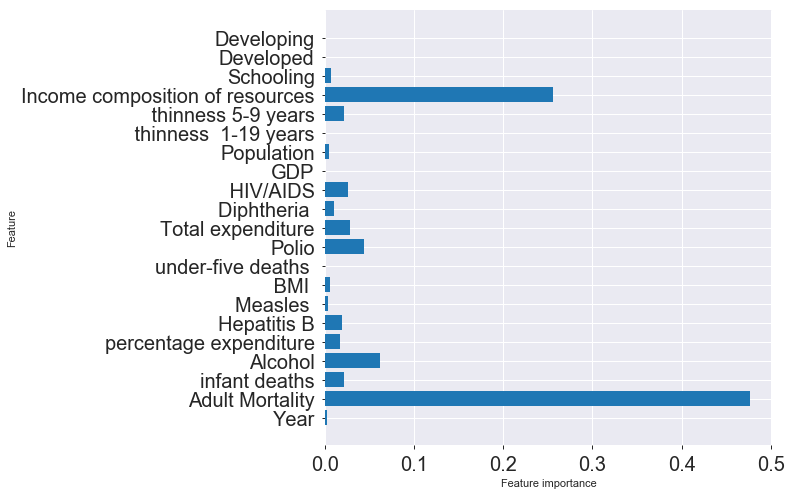

In [54]:
classifier.feature_importances_
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(classifier)

The Income composition of resources which is the Human Development Index combines education, life expectency, and GNI index (economic factor). 

## Random Forest  with Grid Search
without Income composition of resources and Adult Mortality

In [55]:
X.drop(['Adult Mortality','Income composition of resources','Year'], axis=1, inplace=True)


## Grid search to optimize the random forest model

In [63]:
rfc = RandomForestClassifier

param_grid = {
    'n_estimators': [30, 100, 300],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6]
}

rfc = GridSearchCV(RandomForestClassifier, param_grid, cv=5)



In [64]:
rfc.fit(X_train, y_train)


TypeError: Cannot clone object '<class 'sklearn.ensemble.forest.RandomForestClassifier'>' (type <class 'abc.ABCMeta'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [58]:
gs.best_params_

NameError: name 'gs' is not defined

In [51]:
gs.best_score_

0.9110764430577223

In [77]:
forest2 = RandomForestClassifier(min_samples_split=4, min_samples_leaf=2, n_estimators=30, max_depth= 5)
forest2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
forest2.score(X_train, y_train)

0.9516380655226209

In [79]:
forest2.score(X_test, y_test)

0.9345794392523364

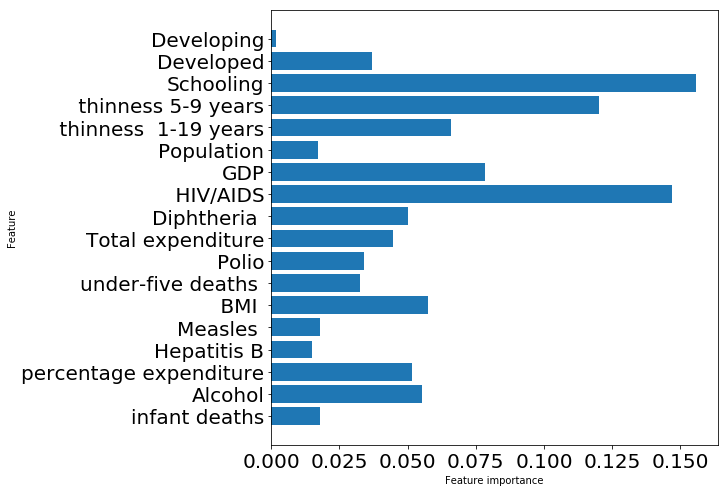

In [80]:
plot_feature_importances(forest2)

## Predict life expectancy for group B

We want to see how the model performs when presented with data from countries it has never seen. If the performance doesn't drop much, the country has little effect on the life expectancy.

In [56]:
df_country_split_b.head()

,Country,Year,target,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [57]:
y_test_2 = df_country_split_a['target']
X_test_2 = df_country_split_a.drop(['Country', 'target','Adult Mortality','Income composition of resources', 'Year'], axis=1)
y_pred_2 = forest2.predict(X_test_2)

acc = accuracy_score(y_test_2,y_pred_2) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_2, y_pred_2)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test_2, y_pred_2, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :94.50292397660819

AUC is :0.94

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,357,36,393
1,11,451,462
All,368,487,855



It's 88% accurate on countries it is never seen before when 70 countries (36%) were completely withheld from training. 

When we increased the number to 100 countries (trained on the remaining), the accuracy dropped to 85%



### Conclusion:
### From our correlations, we see that AIDS negatively impacts life-expectancy, and schooling positively impacts life-expectancy. So if you are suffering from low life-expectancy in your country, then tweaking them (perhaps logistic regression coefficient weights would tell us how much to tweak these) would help improve your country's life expectancy and overall population trend. 